In [1]:
import data_smoothing
import find_peaks
import peak_character

In [2]:
data_nm, data_time, data_z = data_smoothing.load_data_csv('exp03_20180103 -t0 -chirp.csv', 900, 1400, 0)

In [3]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [7]:
threshold = 0.7
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [8]:
idx.describe()

,0,1
count,706.000000,73.000000
mean,45.454674,53.849315
std,16.715689,6.925539
min,10.000000,50.000000
25%,21.250000,52.000000
50%,56.000000,53.000000
75%,56.000000,54.000000
max,58.000000,111.000000


In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def data_grouping(index_df, height_df, fwhm_df):
    peak_list = []
    
    for i in range(index_df.shape[0]):
        for j in range(index_df.shape[1]):
            peak_list.append(
            [index_df.loc[i,j], height_df.loc[i,j], fwhm_df.loc[i,j], i])
        
    all_points = pd.DataFrame(peak_list, 
    columns=['Position', 'Height', 'Width', 'Time'])
    fill_na = all_points.fillna(value=0)
    corrected_output = fill_na.drop(fill_na[abs(fill_na.Height) < 0.0002].index)
    corrected_output = corrected_output.reset_index(drop=True)
    
    return corrected_output

def cluster_classifier(index_df, corrected_output):
    found_peak = index_df.shape[1]
    cluster = KMeans(n_clusters=found_peak).fit(corrected_output.iloc[:,:-2])
    print(cluster.labels_)
    print(cluster.cluster_centers_)
    cluster_dict = {}
    
    for i in range(found_peak):
            cluster_dict['peak_%s' % i] = []
            
    for j in range(corrected_output.shape[0]):
        peak = cluster.predict([corrected_output.values[j,:-2]])
        for k in range(found_peak):
            if (peak == k):
                cluster_dict['peak_%s' % k].append(corrected_output.values[j])
                #print('found a match')

    peak_dict = { k:v for k, v in cluster_dict.items() if len(v) >= 5}
    return peak_dict

In [10]:
corrected_output = data_grouping(idx, height, fwhm)
corrected_output.describe()

,Position,Height,Width,Time
count,774.000000,774.000000,774.000000,774.000000
mean,46.310078,-0.001515,172.969084,336.711886
std,15.975385,0.000647,40.989215,201.950921
min,11.000000,-0.004840,75.329000,3.000000
25%,51.250000,-0.001415,161.760000,158.000000
50%,55.000000,-0.001325,168.643000,319.500000
75%,56.000000,-0.001233,182.393000,512.750000
max,58.000000,-0.000220,278.493000,706.000000


In [11]:
peak_dict = cluster_classifier(idx, corrected_output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.DataFrame(peak_dict['peak_0'])
df2= pd.DataFrame(peak_dict['peak_1'])

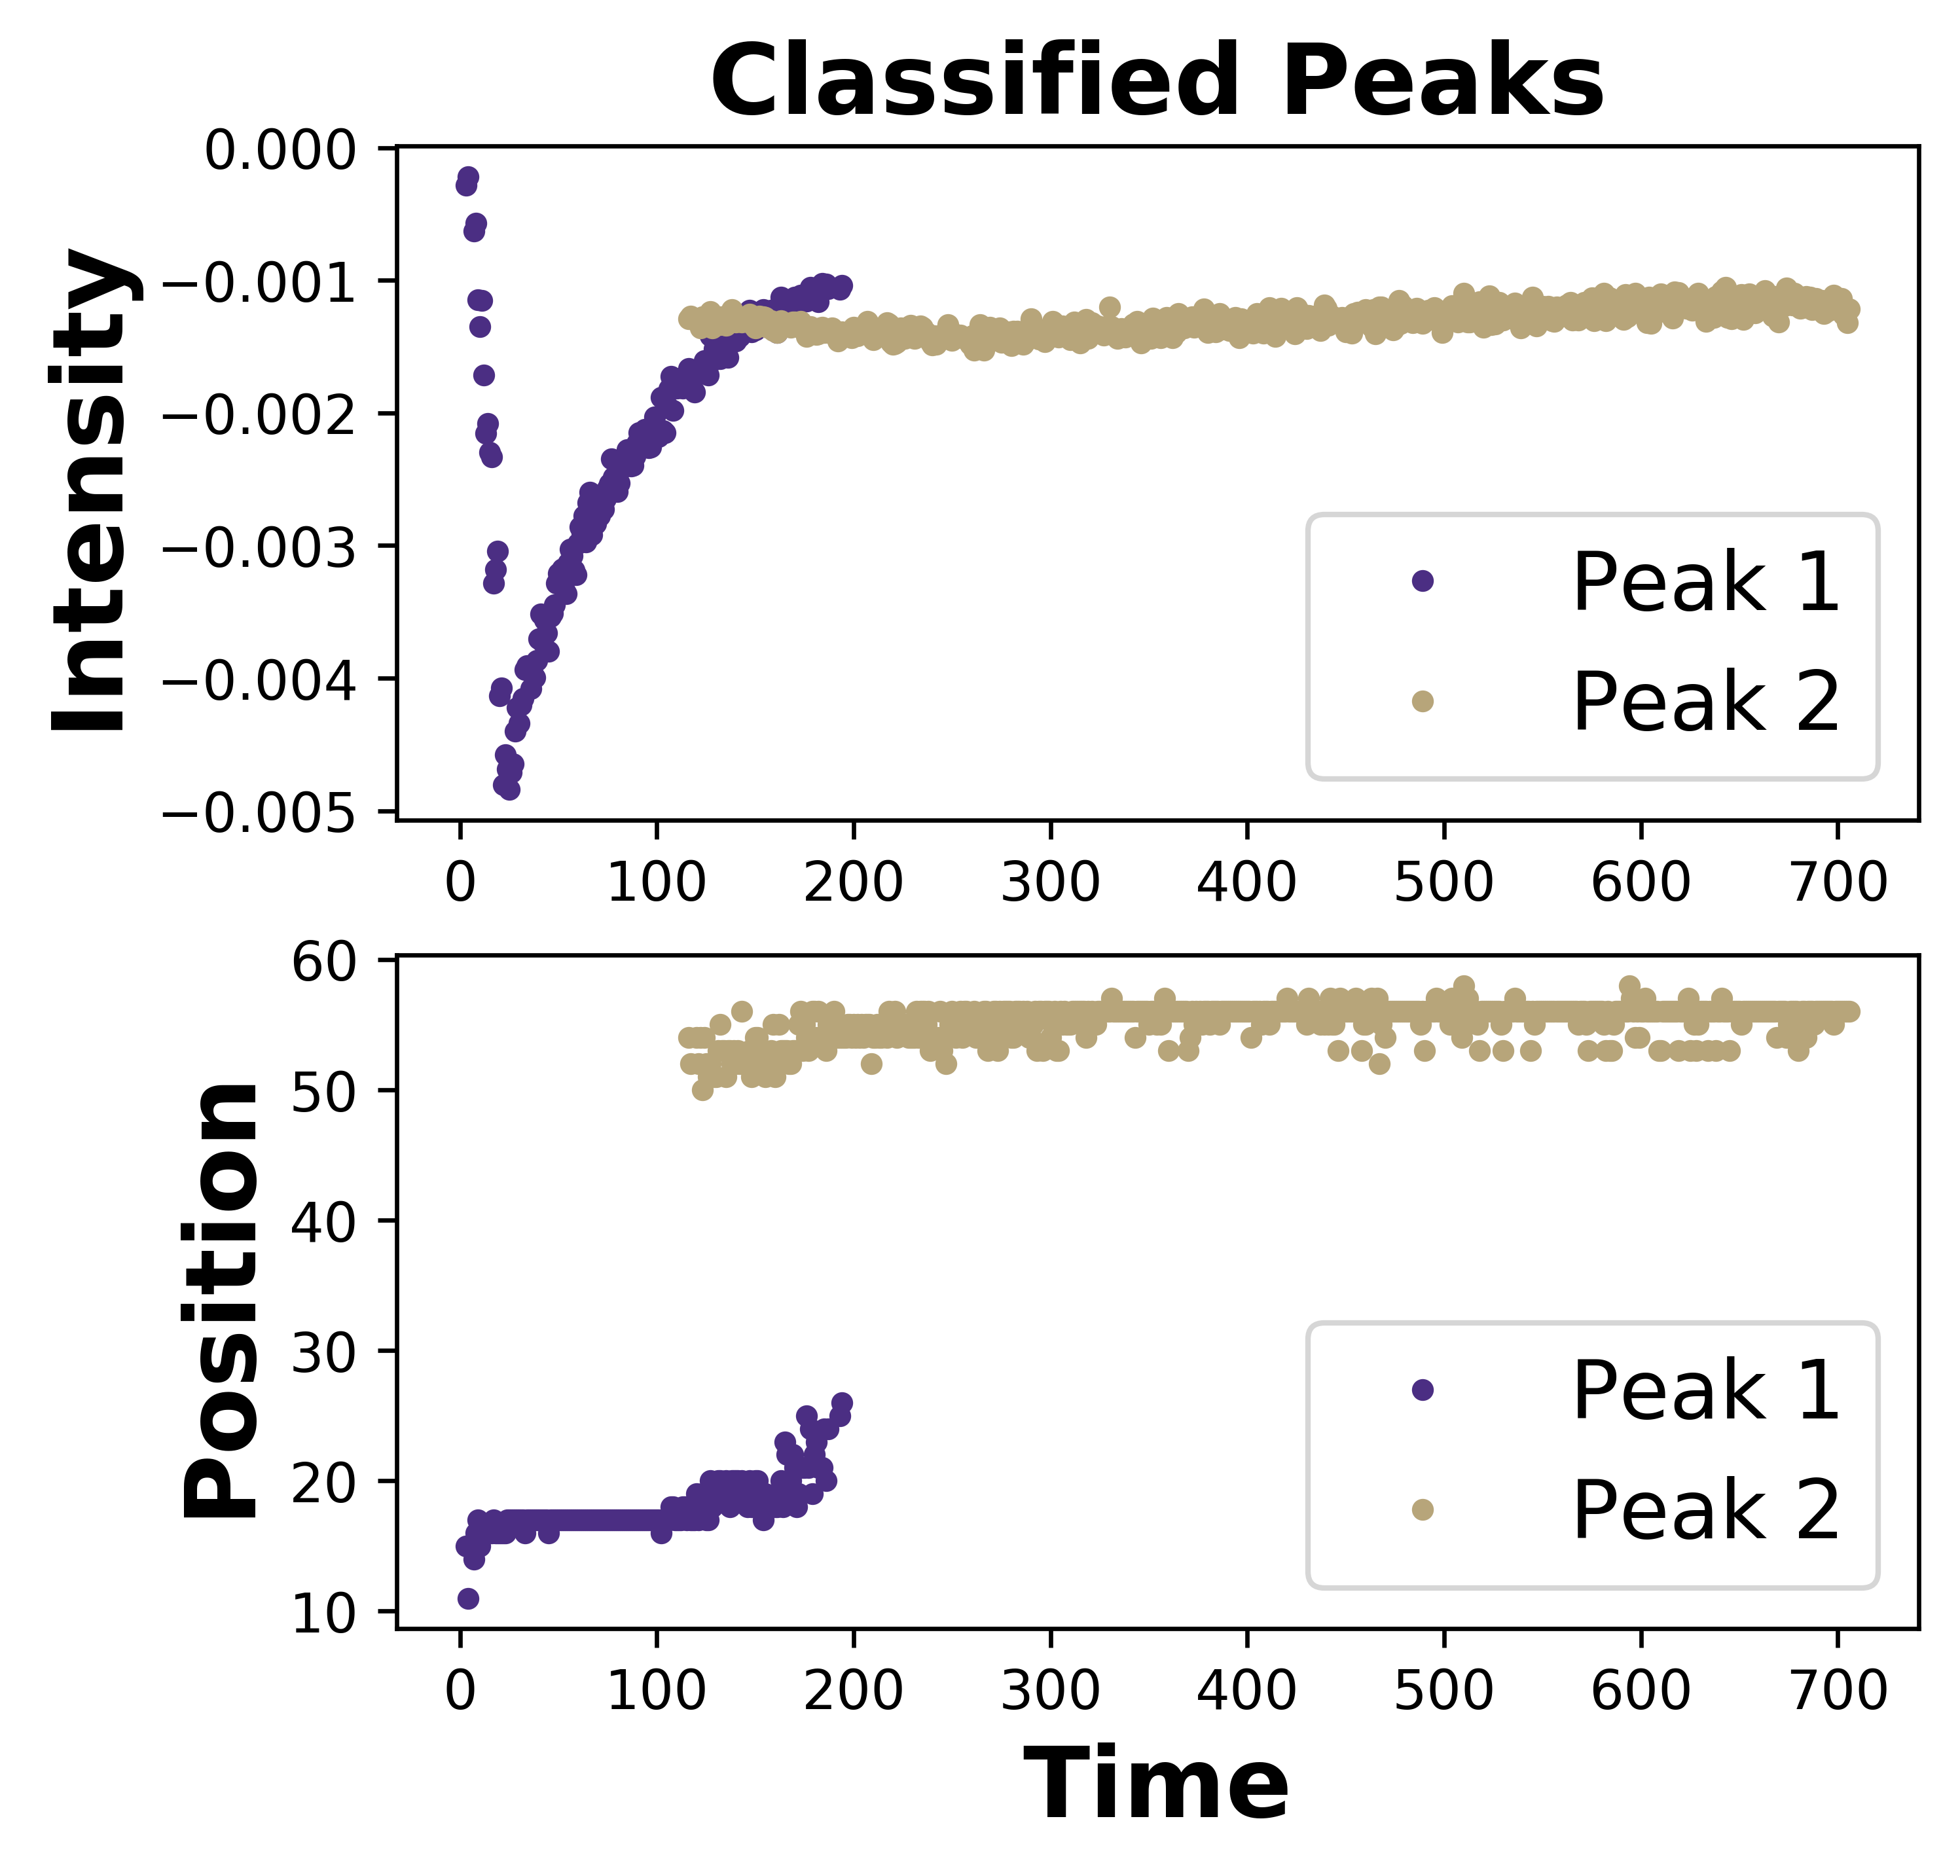

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5), dpi=600)
        
ax1.plot(df1[3], df1[1], '.', label='Peak 1', color='#4b2e83')
ax1.plot(df2[3], df2[1], '.', label='Peak 2', color='#b7a57a')
ax1.set_title('Classified Peaks', fontsize=18, fontweight='bold')
ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
ax1.legend(fontsize=15)
        
ax2.plot(df1[3], df1[0], '.', label='Peak 1', color='#4b2e83')
ax2.plot(df2[3], df2[0], '.', label='Peak 2', color='#b7a57a')
ax2.set_ylabel('Position', fontsize=18, fontweight='bold')
ax2.set_xlabel('Time', fontsize=18, fontweight='bold')
ax2.legend(fontsize=15)
        
plt.show()

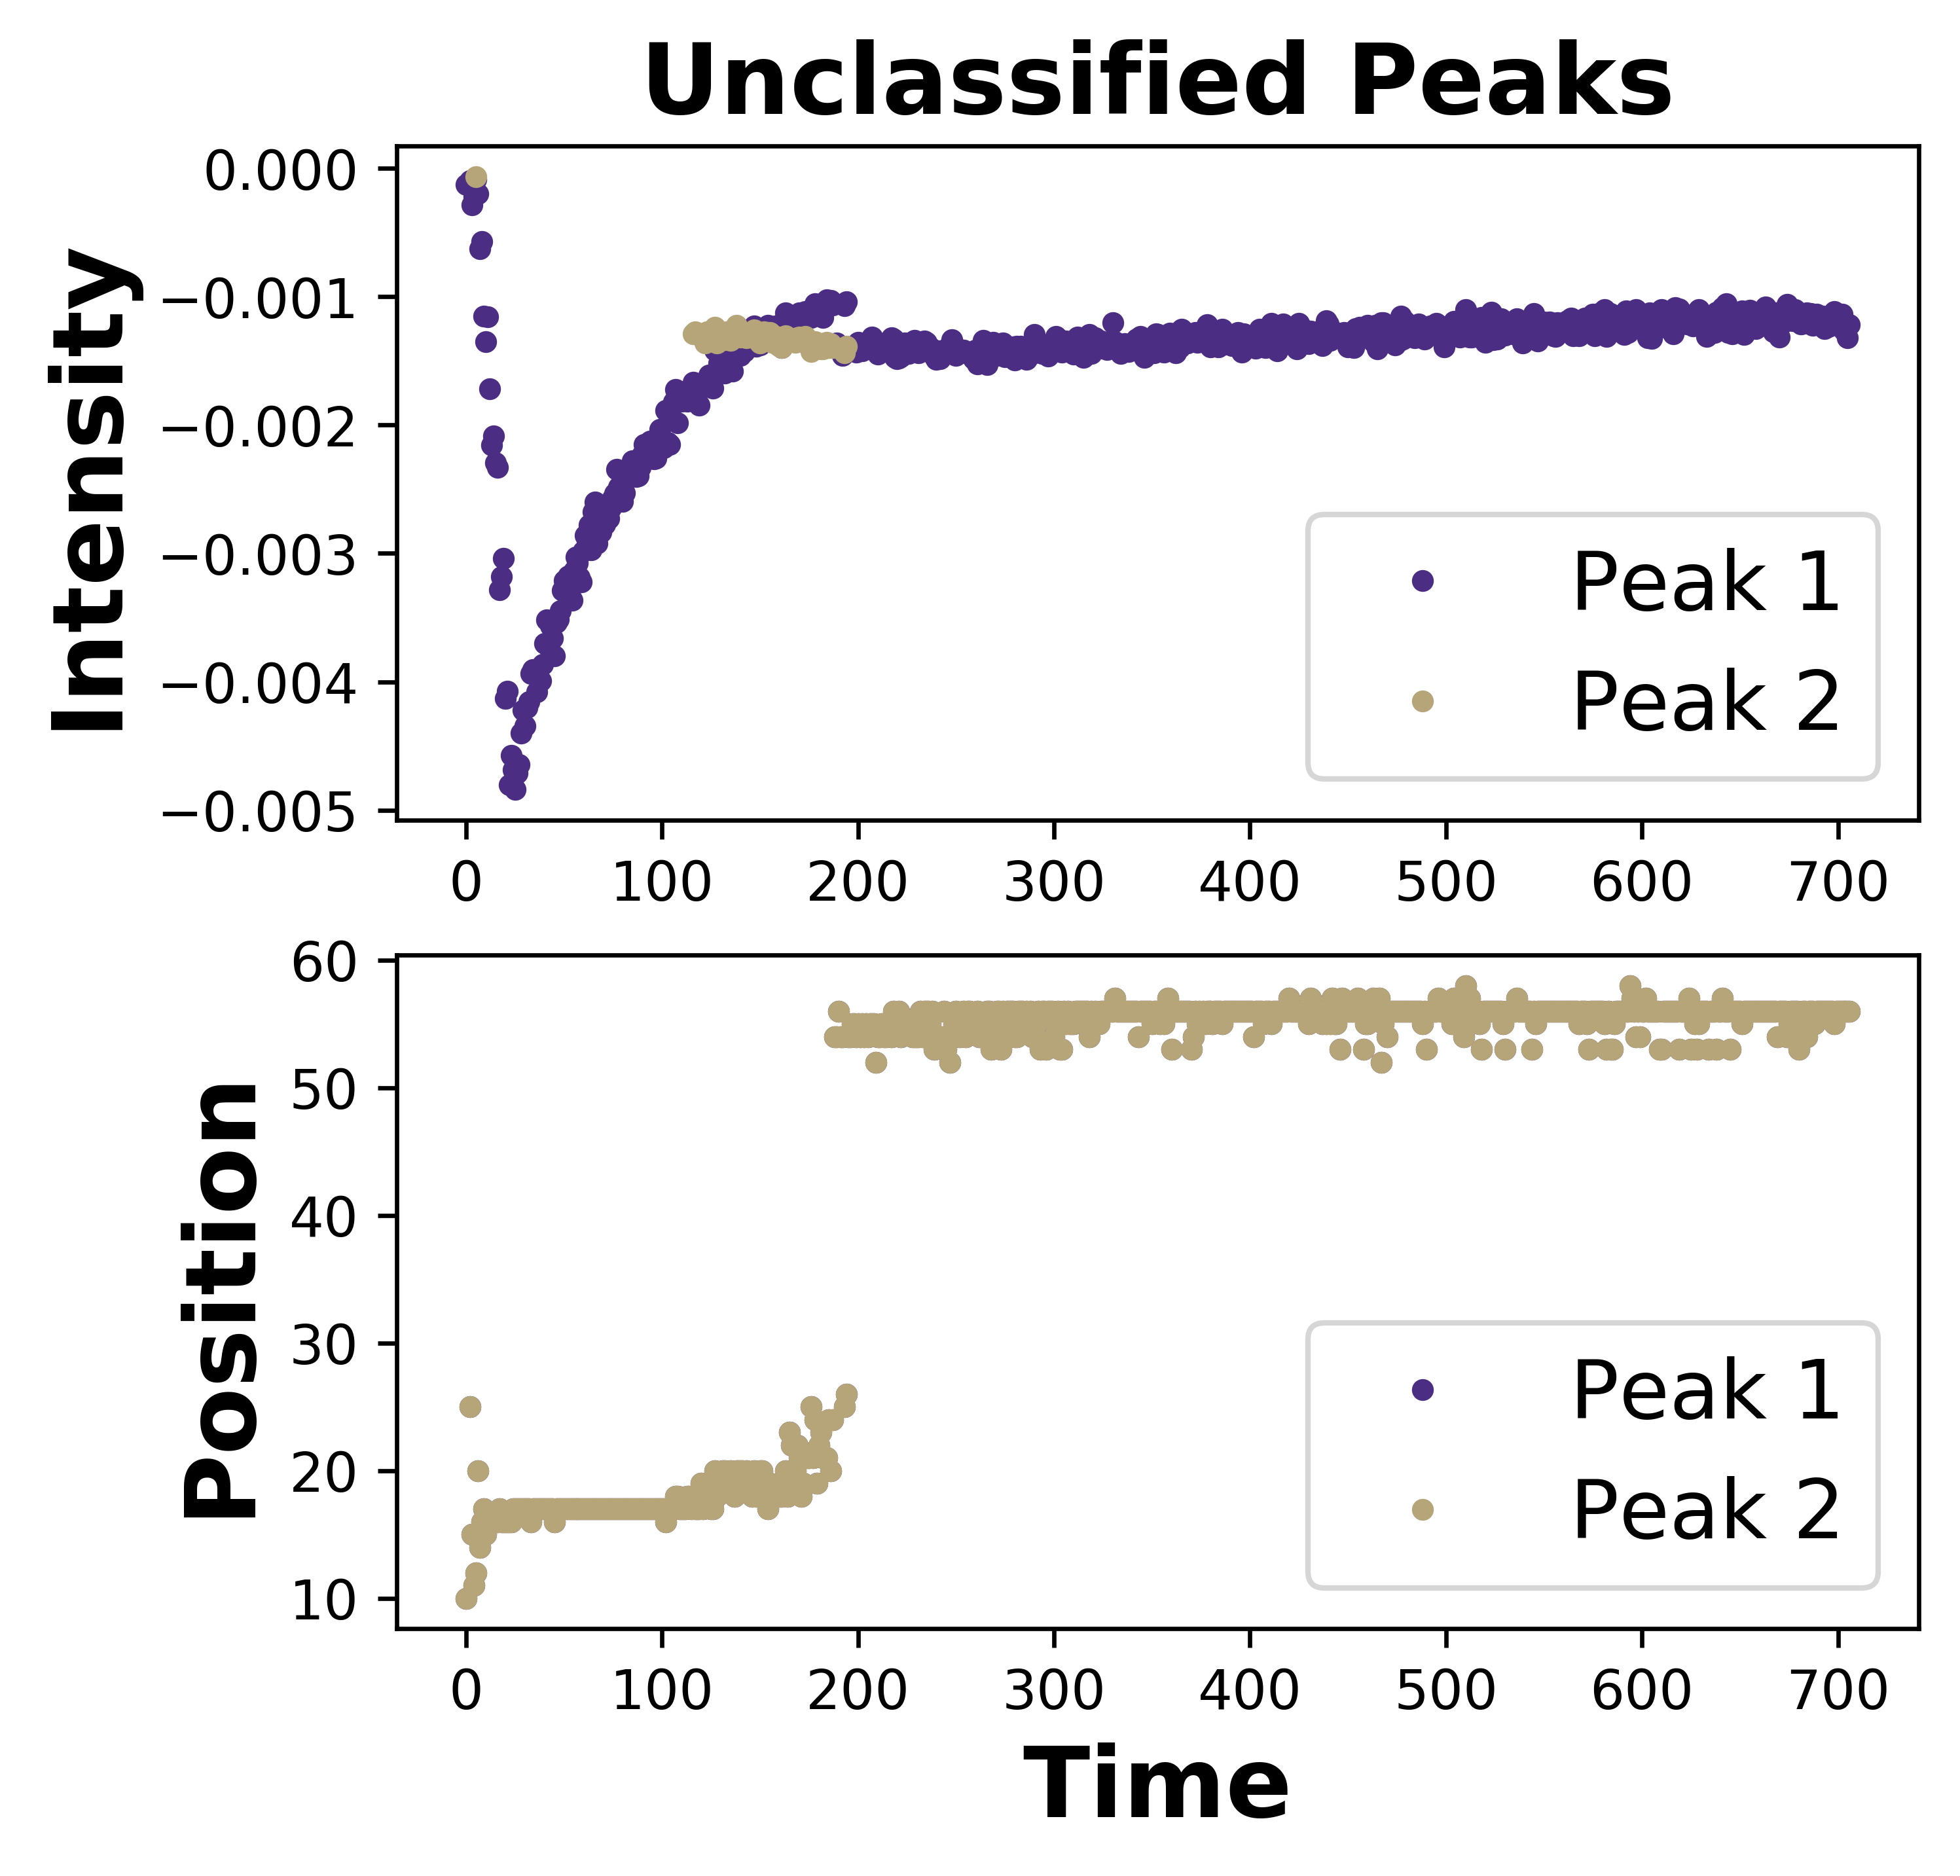

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5), dpi=600)
        
ax1.plot(height.iloc[:, 0], '.', label='Peak 1', color='#4b2e83')
ax1.plot(height.iloc[:, 1], '.', label='Peak 2', color='#b7a57a')
ax1.set_title('Unclassified Peaks', fontsize=18, fontweight='bold')
ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
ax1.legend(fontsize=15)
        
ax2.plot(idx.iloc[:, 0], '.', label='Peak 1', color='#4b2e83')
ax2.plot(idx.iloc[:, 0], '.', label='Peak 2', color='#b7a57a')
ax2.set_ylabel('Position', fontsize=18, fontweight='bold')
ax2.set_xlabel('Time', fontsize=18, fontweight='bold')
ax2.legend(fontsize=15)
        
plt.show()

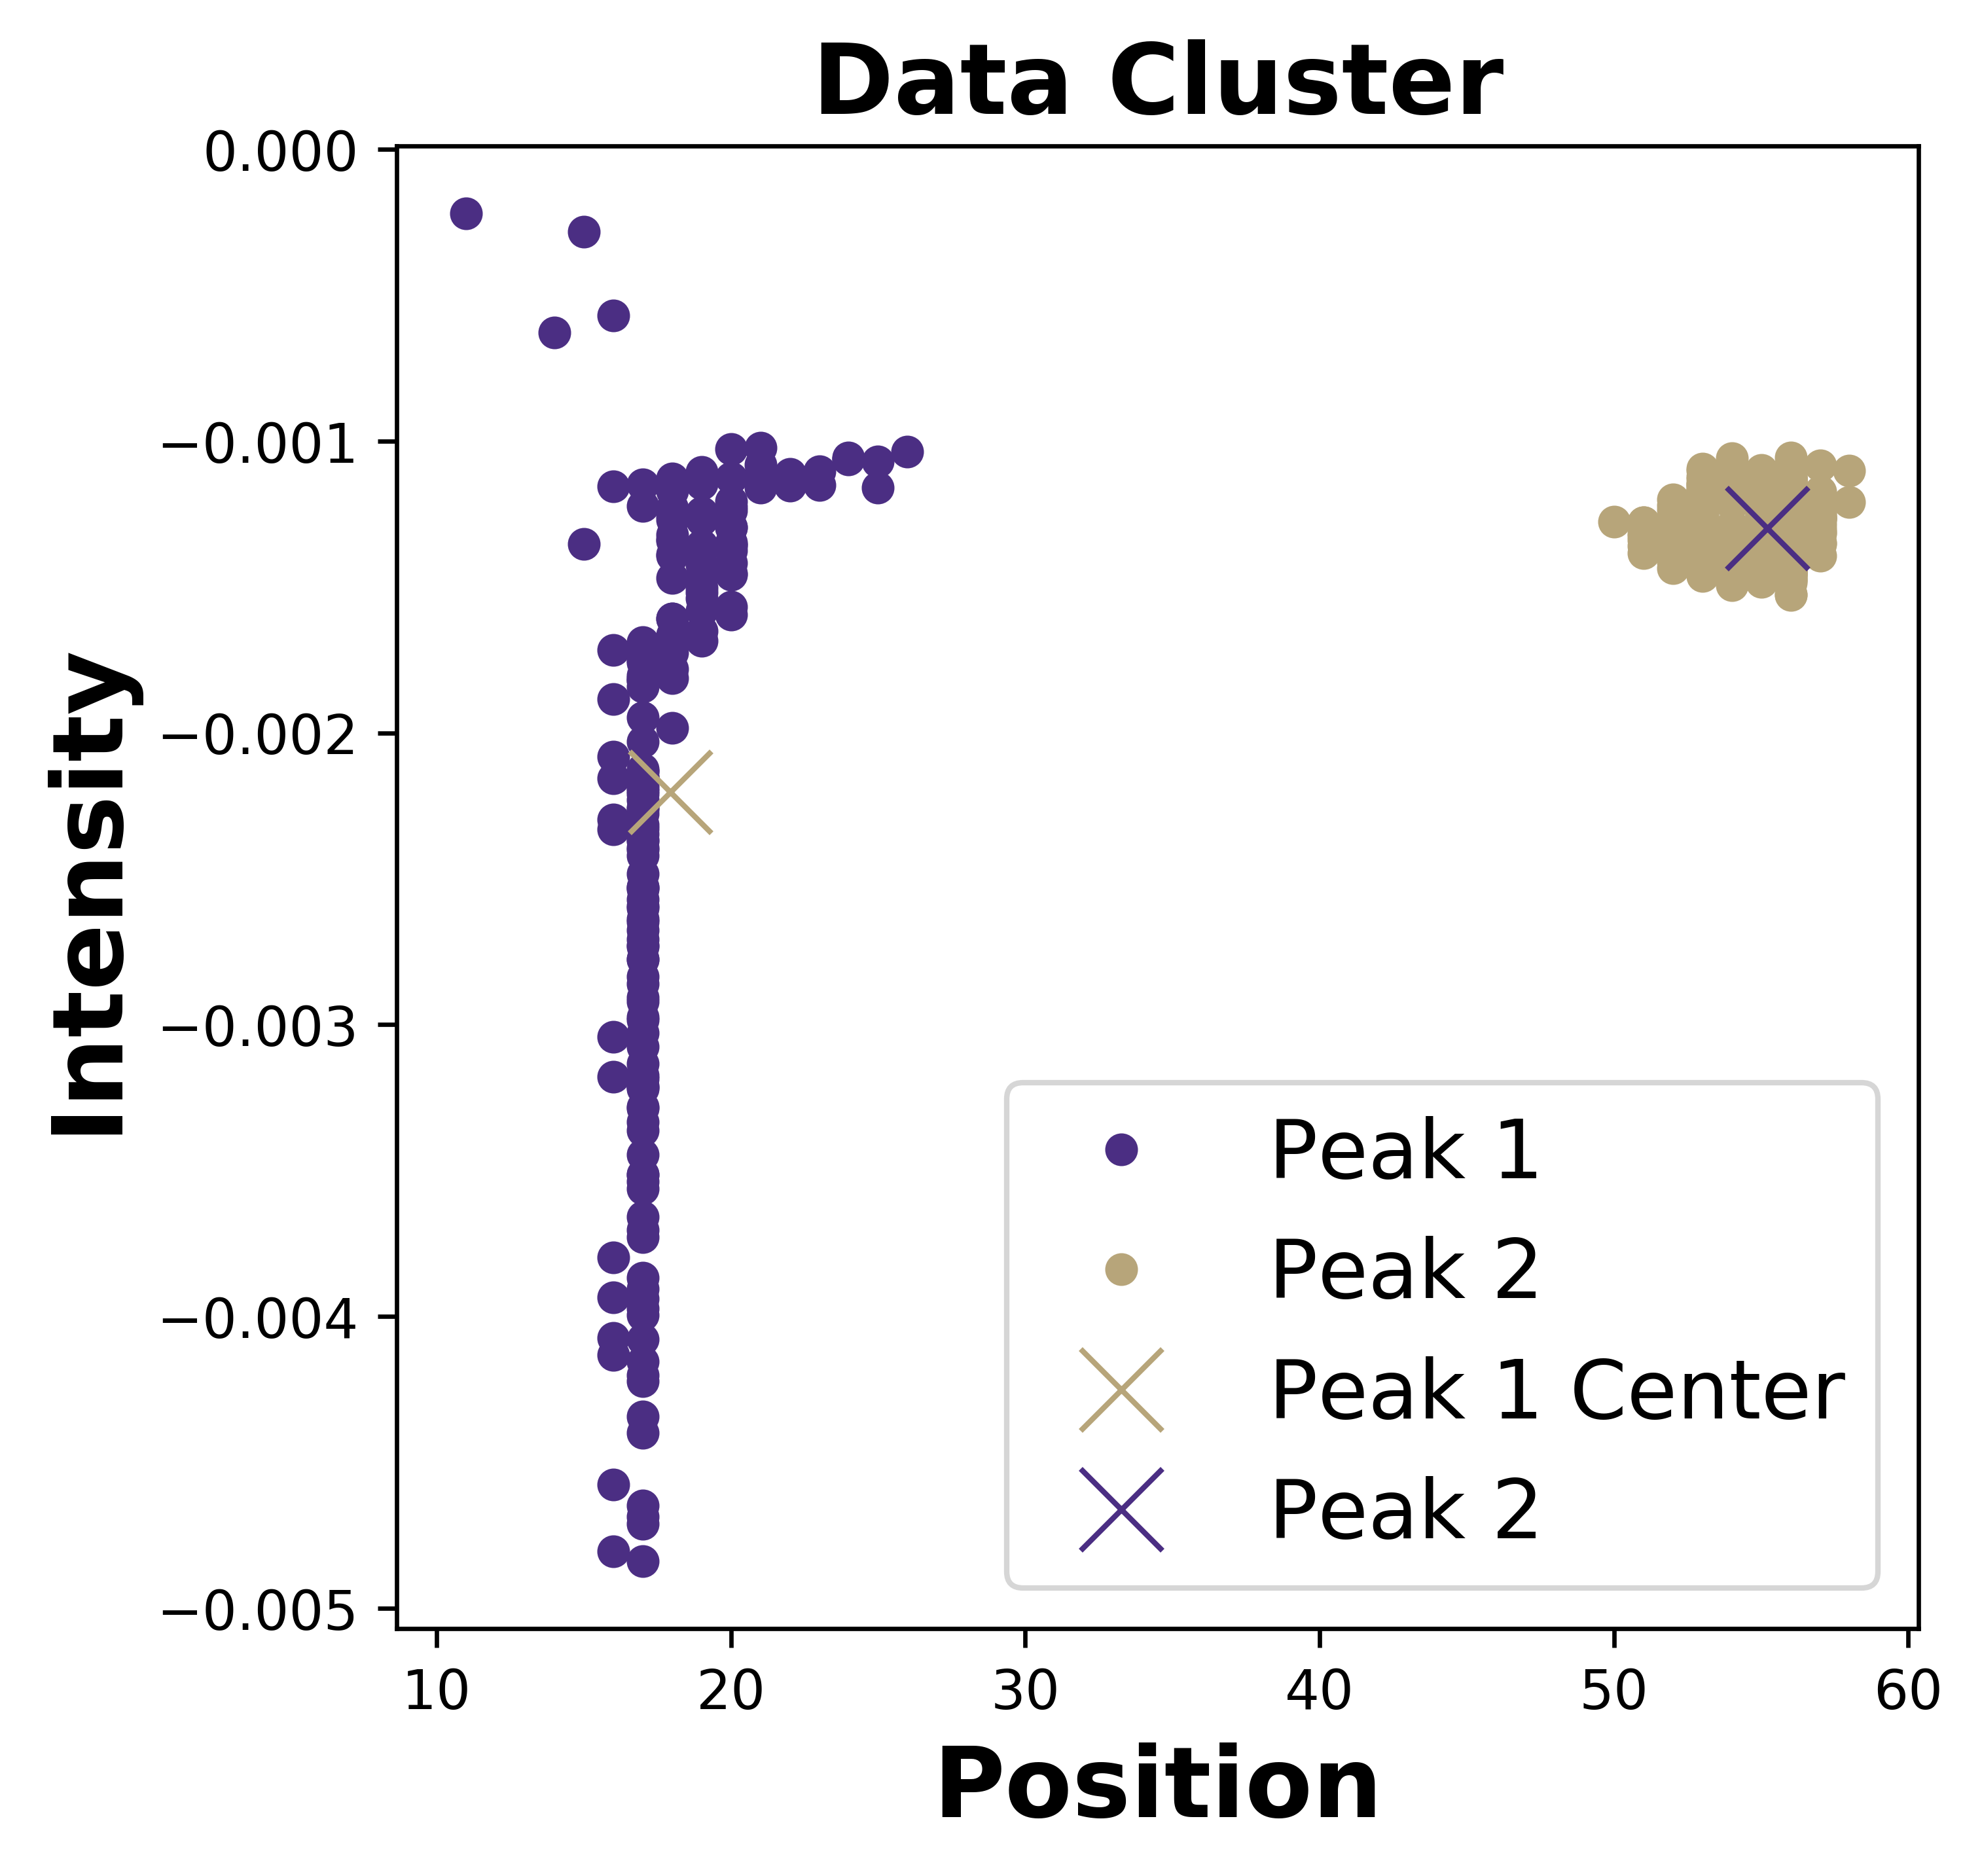

In [38]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
        
ax.plot(df1[0], df1[1], '.', markersize=10, label='Peak 1', color='#4b2e83')
ax.plot(df2[0], df2[1], '.', markersize=10, label='Peak 2', color='#b7a57a')
ax.plot(1.79513514e+01, -2.20352580e-03, 'x', markersize=15, label='Peak 1 Center', color='#b7a57a')
ax.plot(5.52173175e+01, -1.29907469e-03, 'x', markersize=15, label='Peak 2', color='#4b2e83')
ax.set_title('Data Cluster', fontsize=18, fontweight='bold')
ax.set_ylabel('Intensity', fontsize=18, fontweight='bold')
ax.set_xlabel('Position', fontsize=18, fontweight='bold')
ax.legend(fontsize=15)
plt.show()